In [1]:
# Source: https://www.youtube.com/watch?v=ltQbUicDwM4&ab_channel=JasonChong

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

# dates
import datetime
from matplotlib.dates import DateFormatter

# text analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

# statistical analysis
from scipy.stats import ttest_ind

# warnings
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mujib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
transactionData = pd.read_excel("QVI_transaction_data.xlsx")
customerData = pd.read_csv("QVI_purchase_behaviour.csv")

In [4]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transactionData.shape

(264836, 8)

In [6]:
transactionData['TXN_ID'].nunique()

263127

In [7]:
# not the same number of transaction IDs as total rows
# so not all transactions are unique on the list

In [8]:
# look at duplicated transactions
transactionData[transactionData.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [9]:
# Let's observe TX 48887
transactionData.loc[transactionData['TXN_ID'] == 48887, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,43605,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.60


In [10]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


<AxesSubplot:>

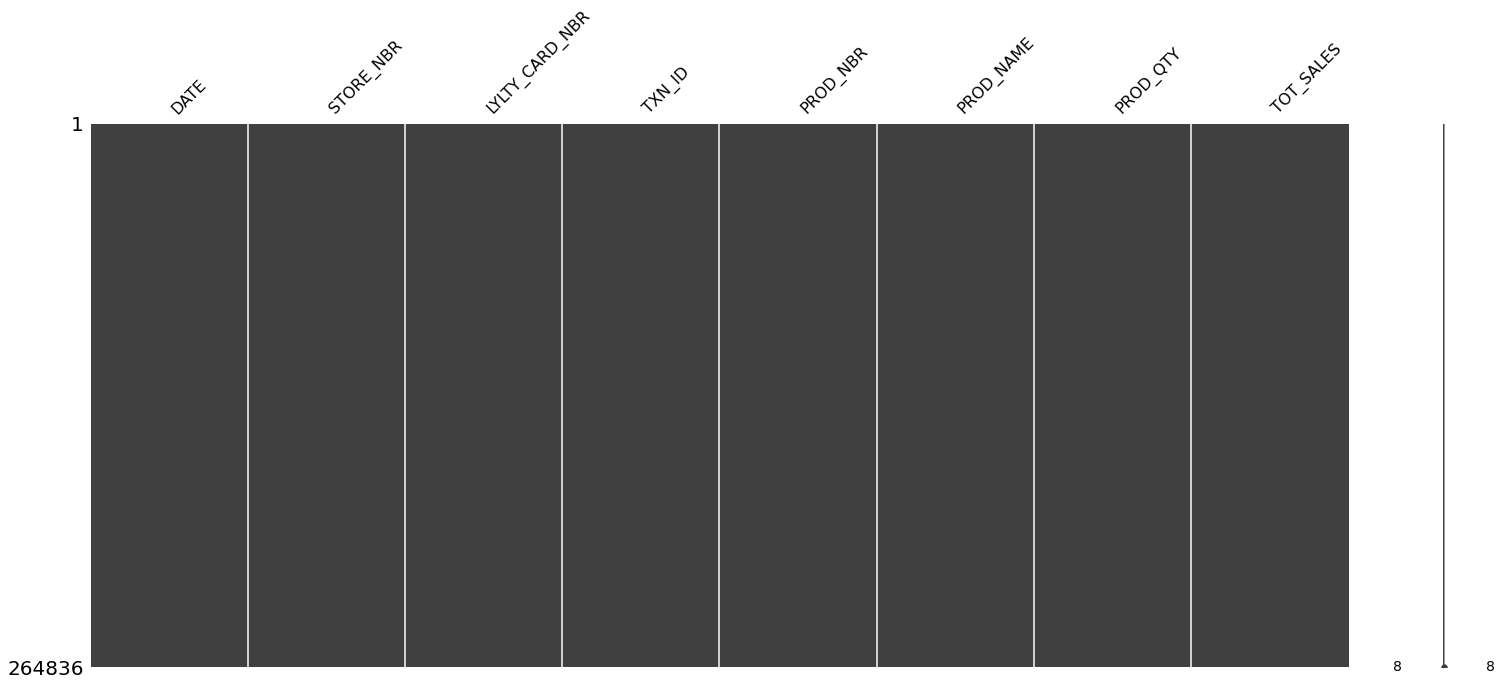

In [11]:
 # plot graph of missing values for 'transactionData'
missingno.matrix(transactionData)
# No missing number in tx

In [12]:
# Exploring the features 
list(transactionData.columns)

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

In [13]:
transactionData['DATE'].head()

0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64

In [14]:
# since date is not the right format, convert the Excel integer to yyyy-mm-dd format

In [15]:
def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days = (xlserialdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

In [16]:
transactionData['DATE'] = transactionData['DATE'].apply(xlseriesdate_to_datetime)

In [17]:
transactionData['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [18]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
transactionData['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [20]:
# Extract weights out of product name
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract("(\d+)")
transactionData['PACK_SIZE'] = pd.to_numeric(transactionData['PACK_SIZE'])
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [21]:
# Create text cleaning function for PROD_NAME feature
def clean_text(text):
    text = re.sub('[&/]', ' ', text) # remove special characters '&' and '/'
    text = re.sub('\d\w*', ' ', text) # remove product weights
    return text

# Apply text cleaning function to PROD_NAME column
transactionData['PROD_NAME'] = transactionData['PROD_NAME'].apply(clean_text)

In [22]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150


In [23]:
# create one giant string and apply word_tokenize to separate the words
cleanProdName = transactionData['PROD_NAME']
string = ''.join(cleanProdName)

In [24]:
prodWord = word_tokenize(string)
prodWord

['Natural',
 'Chip',
 'Compny',
 'SeaSalt',
 'CCs',
 'Nacho',
 'Cheese',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 'Smiths',
 'Chip',
 'Thinly',
 'S',
 'Cream',
 'Onion',
 'Kettle',
 'Tortilla',
 'ChpsHny',
 'Jlpno',
 'Chili',
 'Old',
 'El',
 'Paso',
 'Salsa',
 'Dip',
 'Tomato',
 'Mild',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 'Vinegar',
 'Grain',
 'Waves',
 'Sweet',
 'Chilli',
 'Doritos',
 'Corn',
 'Chip',
 'Mexican',
 'Jalapeno',
 'Grain',
 'Waves',
 'Sour',
 'Cream',
 'Chives',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 'Vinegar',
 'Kettle',
 'Sensations',
 'Siracha',
 'Lime',
 'Twisties',
 'Cheese',
 'WW',
 'Crinkle',
 'Cut',
 'Chicken',
 'Thins',
 'Chips',
 'Light',
 'Tangy',
 'CCs',
 'Original',
 'Burger',
 'Rings',
 'NCC',
 'Sour',
 'Cream',
 'Garden',
 'Chives',
 'Doritos',
 'Corn',
 'Chip',
 'Southern',
 'Chicken',
 'Cheezels',
 'Cheese',
 'Box',
 'Smiths',
 'Crinkle',
 'Original',
 'NCC',
 'Sour',
 'Cream',
 'Garden',
 'Chives',
 'Infzns',
 'Crn',
 'Crnchers',


In [25]:
# Apply 'fdist' function which computes the frequency of each token and put it into a dataframe

wordFrequency = fdist(prodWord)
freq_df = pd.DataFrame(list(wordFrequency.items()), columns = ["Word", "Frequency"]).sort_values(by = 'Frequency', ascending = False)

In [26]:
freq_df

,Word,Frequency
10,Chips,49770
16,Kettle,40739
7,Smiths,28572
6,Cheese,27890
66,Pringles,24743
...,...,...
208,SaltNCC,12
224,SaltSnbts,11
225,SaltFrench,10
222,SaltGrnWves,8


In [27]:
transactionData['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt 
1                    CCs Nacho Cheese     
2      Smiths Crinkle Cut  Chips Chicken  
3      Smiths Chip Thinly  S Cream Onion  
4    Kettle Tortilla ChpsHny Jlpno Chili  
Name: PROD_NAME, dtype: object

In [34]:
transactionData['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt ', 'CCs Nacho Cheese     ',
       'Smiths Crinkle Cut  Chips Chicken  ',
       'Smiths Chip Thinly  S Cream Onion  ',
       'Kettle Tortilla ChpsHny Jlpno Chili  ',
       'Old El Paso Salsa   Dip Tomato Mild  ',
       'Smiths Crinkle Chips Salt   Vinegar  ',
       'Grain Waves         Sweet Chilli  ',
       'Doritos Corn Chip Mexican Jalapeno  ',
       'Grain Waves Sour    Cream Chives  ',
       'Kettle Sensations   Siracha Lime  ', 'Twisties Cheese      ',
       'WW Crinkle Cut      Chicken  ', 'Thins Chips Light   Tangy  ',
       'CCs Original  ', 'Burger Rings  ',
       'NCC Sour Cream      Garden Chives  ',
       'Doritos Corn Chip Southern Chicken  ', 'Cheezels Cheese Box  ',
       'Smiths Crinkle      Original  ',
       'Infzns Crn Crnchers Tangy Gcamole  ',
       'Kettle Sea Salt     And Vinegar  ',
       'Smiths Chip Thinly  Cut Original  ', 'Kettle Original  ',
       'Red Rock Deli Thai  Chilli Lime  ',
       'Pring

In [35]:
# Drop rows with 'salsa' in 'PROD_NAME'
transactionData['PROD_NAME'] = transactionData['PROD_NAME'].apply(lambda x: x.lower())
transactionData = transactionData[~transactionData['PROD_NAME'].str.contains("salsa")]
transactionData['PROD_NAME'] = transactionData['PROD_NAME'].apply(lambda x: x.title())

In [36]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150


In [37]:
# Exploreproduct quantity
transactionData['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [38]:
# inspect 200
transactionData.loc[transactionData['PROD_QTY'] == 200, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [39]:
# see if the customer with loyalty card number 22600 has made any other purchases
transactionData.loc[transactionData['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [42]:
# only 2 transactions from this customer. More likely to be a commerical purchase rather than a regular customer
transactionData.drop(transactionData.index[transactionData['LYLTY_CARD_NBR'] == 226000], inplace = True)
customerData.drop(customerData.index[customerData['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [43]:
transactionData['PROD_QTY'].value_counts()

2    220070
1     25476
5       415
3       408
4       371
Name: PROD_QTY, dtype: int64

In [44]:
# examine the date
transactionData['DATE'].nunique()

364

In [45]:
# there is one date that is missing 
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transactionData['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [46]:
# retail closed on xmas

In [47]:
# Create a new dataframe which contains the total sale for each date

a = pd.pivot_table(transactionData, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [48]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
len(b)

365

In [49]:
c = a + b
c.fillna(0, inplace = True)

In [50]:
c.head()

,TOT_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [51]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c.head()

,Total Sales
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


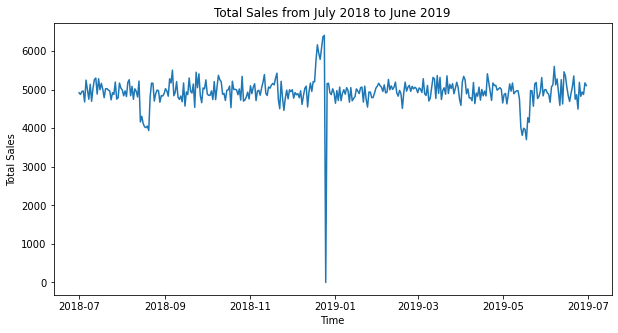

In [52]:
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

In [54]:
temp = a = pd.pivot_table(transactionData, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')

In [55]:
temp.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [56]:
# Confirm the date where sales count equals to zero

c[c['Total Sales'] == 0]

,Total Sales
Date,
2018-12-25,0.0


In [57]:
# Let's look at the December month only
c_december = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]
c_december.head()

,Total Sales
Date,
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5


Text(0.5, 1.0, 'Total Sales in December')

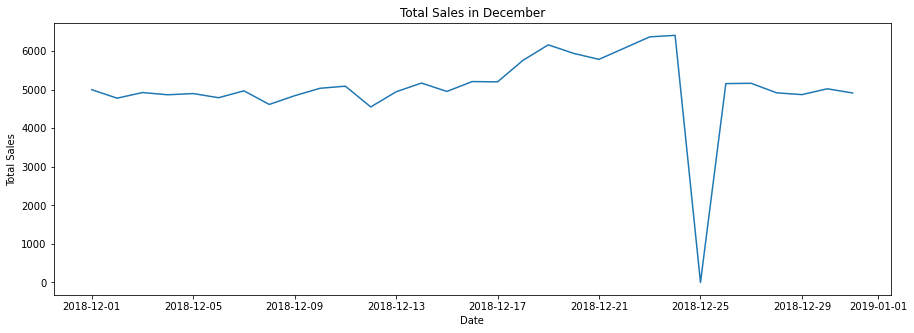

In [58]:
plt.figure(figsize = (15, 5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

In [66]:
temp = a = pd.pivot_table(transactionData, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')

In [67]:
c

,Total Sales
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0
...,...
2019-06-26,4829.7
2019-06-27,4941.3
2019-06-28,4876.6


In [68]:
# Reset index
c_december.reset_index(drop = True, inplace = True)
c_december.head()

,Total Sales
0,5000.9
1,4781.1
2,4927.0
3,4869.4
4,4900.5


In [69]:
# Relabel Date
c_december['Date'] = c_december.index + 1
c_december.head()

,Total Sales,Date
0,5000.9,1
1,4781.1,2
2,4927.0,3
3,4869.4,4
4,4900.5,5


<AxesSubplot:xlabel='Date', ylabel='Total Sales'>

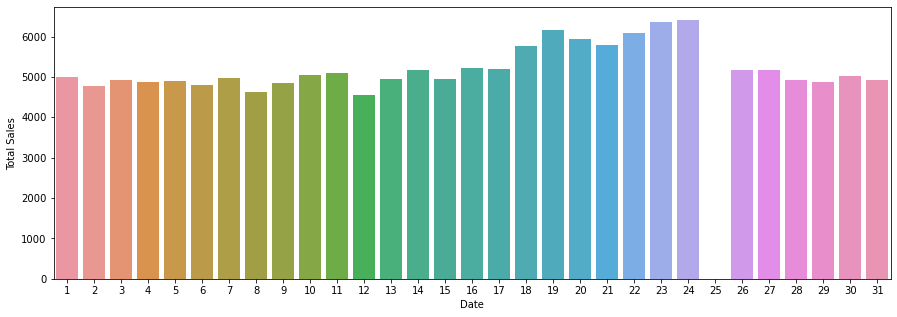

In [70]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Date', y ='Total Sales', data = c_december)